# HOMEWORK 1
## Pixel-wise Image Transformations

## Task 1

The image is loaded and a picture collage consisting of four images is created. 
Each image is a version of the original image with the colour channels swapped.


In [142]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [143]:
def show_image_scaled(img, scale=100):
    """
    Display an image with a figure size automatically adjusted
    to preserve its aspect ratio.
    """
    h, w = img.shape[:2]
    fig_w = w / scale
    fig_h = h / scale

    fig = plt.figure(figsize=(fig_w, fig_h))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.imshow(img)
    ax.axis('off')
    plt.show()


shape: (590, 750, 3)


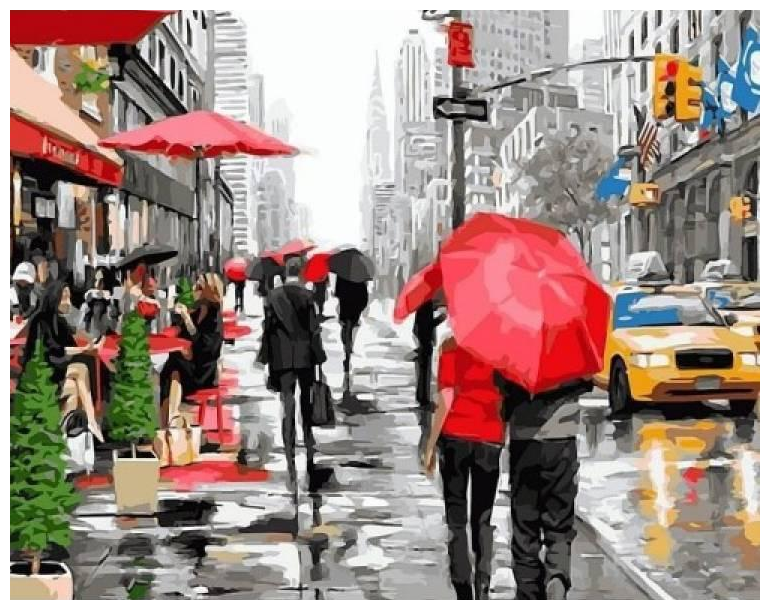

In [144]:
img1 = cv2.imread('data/NYC1.jpg')
print(f'shape: {img1.shape}')

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

show_image_scaled(img1_rgb)

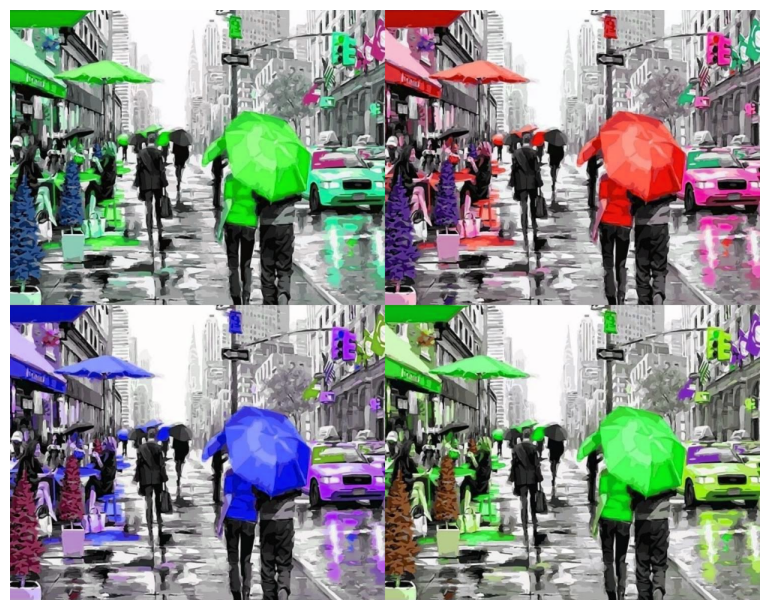

In [145]:
red, green, blue = cv2.split(img1_rgb)

img1_brg = cv2.merge([blue, red, green])
img1_rbg = cv2.merge([red, blue, green])
img1_grb = cv2.merge([green, red, blue])
img1_gbr = cv2.merge([green, blue, red])

out1 = np.hstack([img1_brg, img1_rbg])
out2 = np.hstack([img1_gbr, img1_grb])
out = np.vstack([out1, out2])

show_image_scaled(out, scale=200)


## Task 2

The image is flipped both horizontally and vertically to create a simple geometric collage.

(800, 1200, 3)


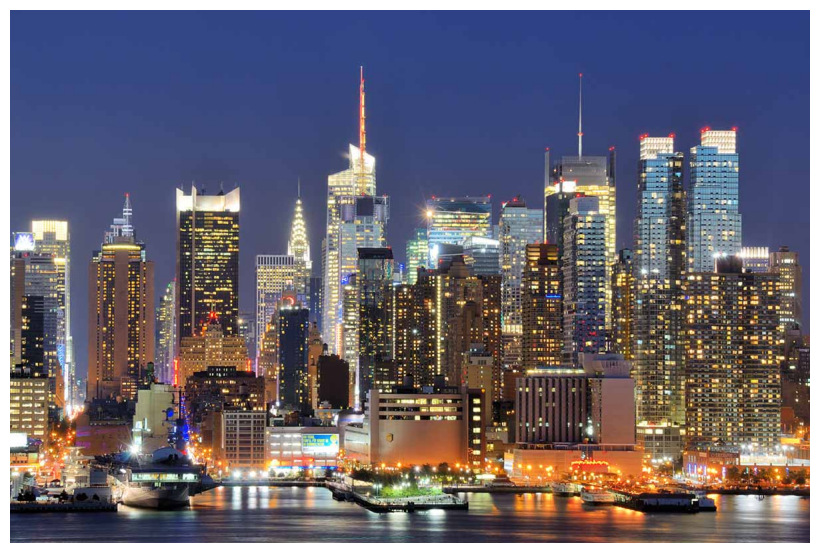

In [146]:
img2 = cv2.imread('data/NYC2.jpg')
print(img2.shape)

img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

show_image_scaled(img2_rgb, scale = 150)

### 2.1 Manual implementation
The image is flipped horizontally and vertically using manual NumPy array slicing.

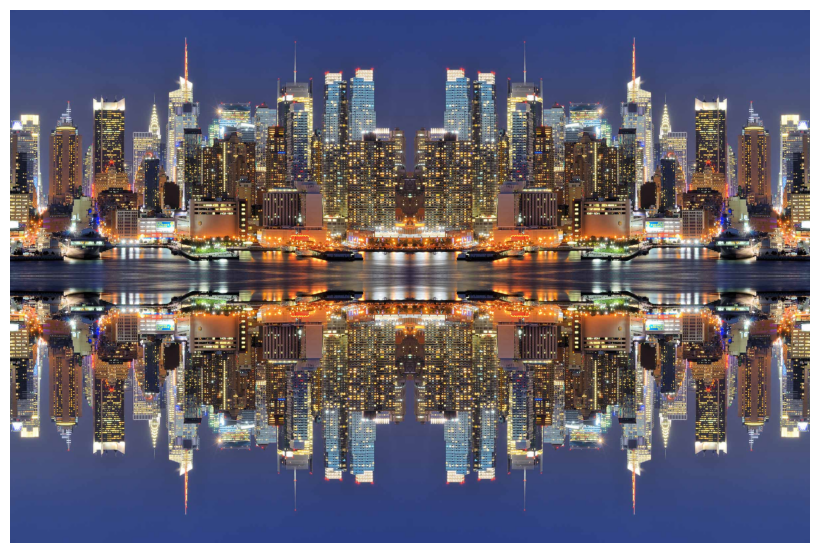

In [137]:
# horizontal flip
h_flip = img2_rgb[:, ::-1, :]

# vertical flip
v_flip = img2_rgb[::-1, :, :]

# both flips
hv_flip = img2_rgb[::-1, ::-1, :]

# collage
top = np.hstack([img2_rgb, h_flip])
bottom = np.hstack([v_flip, hv_flip])
collage_manual = np.vstack([top, bottom])

show_image_scaled(collage_manual, scale = 300)


### 2.2 NumPy implementation
The image is flipped horizontally and vertically using NumPy functions `fliplr` and `flipud`.

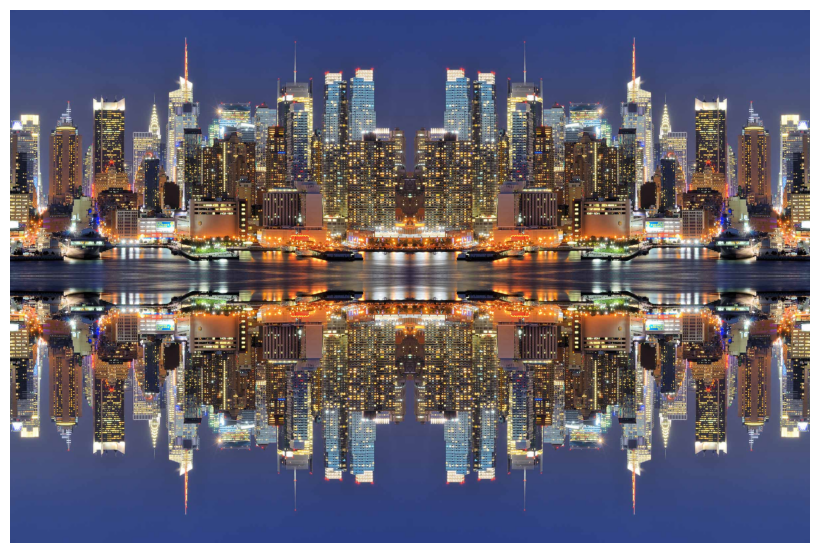

In [141]:
h_flip = np.fliplr(img2_rgb)
v_flip = np.flipud(img2_rgb)
hv_flip = np.flipud(h_flip)

# collage
top = np.hstack([img2_rgb, h_flip])
bottom = np.hstack([v_flip, hv_flip])
collage_np = np.vstack([top, bottom])

show_image_scaled(collage_np, scale = 300)


Basic pixel-wise transformations such as channel reordering and flipping were demonstrated using simple array operations.